# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
``` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [1]:
import pandas as pd
import requests

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [2]:
# 2) seu código aqui
lista_valoresna = sinasc.isna().sum()


In [3]:
# 3) seu código aqui

lista_interessante = ['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 

# VALORES MISSING LISTA INTERESSANTE

lista_interessanteNA = lista_valoresna[lista_interessante]
lista_interessanteNA

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64

In [4]:
# 4) seu código aqui
#ELIMINAR Apgar5 

sinasc= sinasc.dropna(subset=['APGAR5'])

lista_valoresna = sinasc.isna().sum()


lista_interessanteNA = lista_valoresna[lista_interessante]
lista_interessanteNA

#lista_valoresna = 27028 - sinasc[sinasc.isna()== False].count() 
#lista_interessanteNA

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

In [5]:
# 5) seu código aqui

sinasc['ESTCIVMAE'] = sinasc['ESTCIVMAE'].fillna(value=9, method=None, axis=None, inplace=False, limit=None, downcast=None)

sinasc['CONSULTAS'] = sinasc['CONSULTAS'].fillna(value=9, method=None, axis=None, inplace=False, limit=None, downcast=None)

#conferência

print(sinasc['ESTCIVMAE'].isna().sum(),sinasc['CONSULTAS'].isna().sum())

0 0


In [6]:
# 6) Seu código aqui
sinasc['QTDFILVIVO'] = sinasc['QTDFILVIVO'].fillna(value=0)

#conferência

print(sinasc['QTDFILVIVO'].isna().sum())

0


In [7]:
# 7) seu código aqui
#restantes

lista_valoresna = sinasc.isna().sum()


lista_interessanteNA = lista_valoresna[lista_interessante] 
lista_interessanteNA 

# ESCMAE

sinasc['ESCMAE']
# É VARIÁVEL QUALITATIVA

#sinasc['ESCMAE'].value_counts(dropna=False)  / sinasc['ESCMAE'].count()*100

# A Faixa que possui mais frequência é de 8  a 11 anos. Vou substituir pela classificação 8 a 11 anos 

sinasc['ESCMAE'] = sinasc['ESCMAE'].fillna(value='8 a 11 anos')

#Conferência

sinasc['ESCMAE'].value_counts(dropna=False)  / sinasc['ESCMAE'].count()*100


# GESTACAO

sinasc['GESTACAO']

# É VARIÁVEL QUALITATIVA

sinasc['GESTACAO'].value_counts(dropna=False)  / sinasc['GESTACAO'].count()*100

# A Faixa que possui mais frequência é de 37 a 41 semanas. Vou substituir pela classificação 37 a 41 semanas

sinasc['GESTACAO'] = sinasc['GESTACAO'].fillna(value='37 a 41 semanas')

#Conferência

sinasc['GESTACAO'].value_counts(dropna=False)  / sinasc['GESTACAO'].count()*100


# GRAVIDEZ


sinasc['GRAVIDEZ']

# É VARIÁVEL QUALITATIVA

sinasc['GRAVIDEZ'].value_counts(dropna=False)  / sinasc['GRAVIDEZ'].count()*100

# A Faixa que possui mais frequência é de ÚNICA semanas. Vou substituir pela classificação ÚNICA

sinasc['GRAVIDEZ'] = sinasc['GRAVIDEZ'].fillna(value='Única')

#Conferência

sinasc['GRAVIDEZ'].value_counts(dropna=False)  / sinasc['GRAVIDEZ'].count()*100



Única              98.168988
Dupla               1.812442
Tríplice e mais     0.018570
Name: GRAVIDEZ, dtype: float64

<AxesSubplot:xlabel='ASFIXIA'>

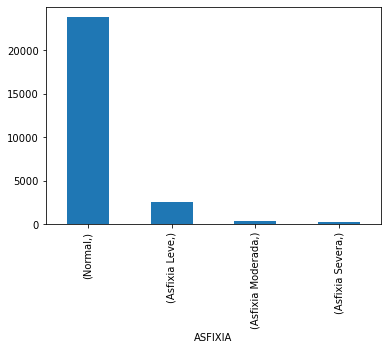

In [8]:
# 8) seu código aqui

sinasc['APGAR1'].value_counts(dropna=False) /sinasc['APGAR1'].count()*100

# Inclui o numero 8 mais freuquente nos dados NA

sinasc['APGAR1'] = sinasc['APGAR1'].fillna(value=8)
sinasc['APGAR1'].value_counts(dropna=False) /sinasc['APGAR1'].count()*100

#categorização
sinasc.loc[sinasc['APGAR1']>=8,'ASFIXIA'] = 'Normal'
sinasc.loc[sinasc['APGAR1']< 8,'ASFIXIA'] = 'Asfixia Leve'
sinasc.loc[sinasc['APGAR1']< 6,'ASFIXIA'] = 'Asfixia Moderada'    
sinasc.loc[sinasc['APGAR1']< 4,'ASFIXIA'] = 'Asfixia Severa'

frequencias = sinasc[['ASFIXIA']].value_counts()
frequencias

frequencias.plot(kind='bar', x='Asfixia',y='Qtde')

In [42]:
# 9) seu código aqui
colunas = pd.DataFrame(sinasc.columns,columns=['Colunas'])
sinasc.columns = colunas['Colunas'].str.lower()

sinasc

Colunas,origem,codestab,codmunnasc,locnasc,idademae,estcivmae,escmae,codocupmae,qtdfilvivo,qtdfilmort,...,contador,munresstatus,munrestipo,munresnome,munresuf,munreslat,munreslon,munresalt,munresarea,asfixia
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,Normal
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Normal
